## Question 1

1. 	A sample of n households is selected as part of a study on electricity usage in March. In a very large study in March of the previous year it was found that the population standard deviation of the usage was $\sigma = 81\text{kWh}$. Given a $99\%$ confidence interval for the mean usage, as the code below,

---
```python
from scipy.stats import norm

sigma = 81
alpha = 0.01
```
---

which of the following code calculates the minimum sample size n (no need to round to an integer) such that the width of the confidence interval is no larger than $50\text{kWh}$? (Ans: D)

    A. 
---
```python
z = norm.ppf(1 - alpha/2)
n = (z*sigma/50) ** 2
```
---

    B.
---
```python
z = norm.ppf(1 - alpha)
n = (z*sigma/50) ** 2
```
---

    C. 
---
```python
z = norm.ppf(1 - alpha)
n = (2*z*sigma/50) ** 2
```
---

    D.
---
```python
z = norm.ppf(1 - alpha/2)
n = (2*z*sigma/50) ** 2
```
---

<br>

2. Given the parameters defined below,

---
```python
from scipy.stats import norm

alpha = 0.05            # The confidence level 1 - alpha
sigma = 1               # Population standard deviation
n = 20                  # Sample size n
x_bar = 20              # Sample mean

se = sigma / n**0.5
```
---

The sample size is `n`, and the sample mean is `x_bar`. The population standard deviation is known to be `sigma`. How to calculate the upper bound of the confidence interval of the population mean? (Ans: A)

    A. 
---
```python
upper = x_bar + norm.ppf(1 - alpha/2)*se
```
---

    B. 
---
```python
upper = x_bar + norm.ppf((1-alpha)/2)*se
```
---

    C.
---
```python
upper = x_bar + norm.ppf(-alpha/2)*se
```
---

    D.
---
```python
upper = x_bar - norm.ppf(1-alpha/2)*se
```
---

## Question 2

We toss a die 65 times, and the results are given in the following table.

Tossed number | Number of appearances
:------------:|:---------------------:
1 | 12
2 | 7
3 | 11
4 | 9
5 | 15
6 | 11

1. What is the sample mean of the tossed numbers?

**Solution**:

The sample mean is calculated by
\begin{align}
\bar{x} = \frac{1}{65}\sum\limits_{i=1}^{65} x_i = \frac{1\times 12 + 2\times 7 + 3\times 11 + 4 \times 9 + 5\times 15 + 6\times 11}{65} = 3.63, 
\end{align}
because among all $x_i$, there are 12 ones, 7 twos, 11 threes, 9 fours, 15 fives, and 11 sixes. 

In [2]:
n = 65
mean_s = (1*12 + 2*7 + 3*11 + 4*9 + 5*15 + 6*11) / n
mean_s

3.6307692307692307

2. What is the sample deviation of the tossed number?

**Solution**:

The sample standard deviation can be calculated as
\begin{align}
s =& \sqrt{\frac{1}{65-1}\sum\limits_{i=1}^{65}(x_i - \bar{x})^2} \\
=& \sqrt{\frac{(1 - \bar{x})^2\times 12 + (2-\bar{x})^2\times 7 + (3-\bar{x})^2\times 11 + (4-\bar{x})^2 \times 9 + (5-\bar{x})^2\times 15 + (6-\bar{x})^2\times 11}{64}} = 1.755, 
\end{align}

In [16]:
var_s = ((1-3.63)**2*12 + (2-3.63)**2*7 + (3-3.63)**2*11 + (4-3.63)**2*9 + (5-3.63)**2*15 + (6-3.63)**2*11) / (n-1)
std_s = var_s ** 0.5
std_s

1.2659984330639296

3. Write down the Python code for calculating the confidence interval of the population mean in terms of the lower and upper bounds, assuming $\alpha=0.05$

In [17]:
# Use mean_s to denote the sample mean
# Use std_s to denote the sample standard deviation
# Use lower to represent the lower bound
# Use upper to represent the upper bound

n = 65
alpha = 0.05

**Solution**:

The confidence interval of the population mean can be expressed as $\bar{x} \pm t_{\alpha/2} \cdot \frac{s}{\sqrt{n}}$, so the python code is given below.

In [18]:
from scipy.stats import t

t_alpha2 = t.ppf(1-alpha/2, n-1)
moe = t_alpha2 * (std_s/n**0.5)

lower = mean_s - moe
upper = mean_s + moe

The code above gives the solutions below.

In [19]:
print(f'CI: [{lower}, {upper}]')

CI: [3.317070178948471, 3.9444682825899906]


4. Based on the given data, can we conclude that the mean tossed number is different from 3.5? Answer this question using the hypothesis testing (P-value), with the significance level to be $\alpha=0.05$

#### Part (a)
What are the null and alternative hypotheses.

**Solution**:

Let $\mu$ be the population mean, then we have hypotheses to be:
- Null hypothesis $H_0:~ \mu = 3.5$
- Alternative hypothesis $H_a:~ \mu \not= 3.5$

#### Part (b)
Use Python to calculate the $P$-value.

In [20]:
# Use mean_s to denote the sample mean
# Use std_s to denote the sample standard deviation
# Use p_value to represent the P-value

n = 65
alpha = 0.05

#### Solution: 
The standardized $t$ value is expressed as
\begin{align}
t = \frac{\bar{x} - 3.5}{s/\sqrt{n}}.
\end{align}
Note that this is a two-tailed test, the $P$-value can be calculated by the following code cell.

In [21]:
t_value = (mean_s - 3.5) / (std_s/n**0.5)
p_value = 2 * (1 - t.cdf(abs(t_value), n-1))
p_value

0.40806710230746446

In [22]:
t_value

0.8327776847690874

In [23]:
t_value = (mean_s - 3.5) / (std_s/n**0.5)
p_value = 2 * (t.cdf(-abs(t_value), n-1))
p_value

0.40806710230746446

#### Part (c)
What is the interpretation of the $P$-value (how the P-value affects your conclusion)? 

**Solution**:

If $P$-value is larger than $\alpha$, there is insufficient evidence to reject the null hypothesis under the given significance level. In other words, we do not have sufficient evidence to support the conclusion that the mean of the tossed number is different from 3.5. 

If $P$-value is lower than $\alpha$, we reject the null hypothesis in favor of the alternative hypothesis, which implies that the mean of the tossed number is different from 3.5. 

## Question 2

A research paper [Adult persistence of head-turning asymmetry](https://www.nature.com/articles/421711a) studied humans' behavioural asymmetry in terms turning head toward left or right. 

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random as rd
from scipy.stats import norm
from scipy.stats import binom

1. It is assumed that the probability of right-turning preference among all human beings is $p=0.20$. For a sample with $n=15$ observations, plot the sampling distribution of the sample proportion $\hat{p}$. 

**Solution**:

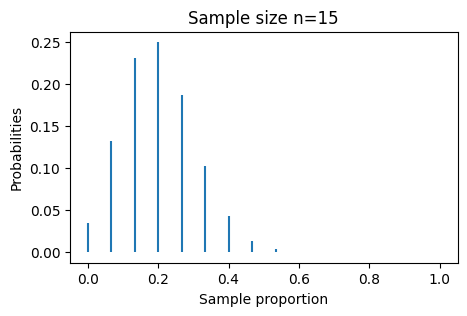

In [24]:
def samp_dist(n, p):
    plt.figure(figsize=(5, 3))
    m = np.arange(0, n + 1)             # m is the sum of X_i
    pmf = binom.pmf(m, n, p)            # Proability of each m value

    plt.vlines(m/n, ymin=0, ymax=pmf)   # Plot the distribution
    plt.xlabel('Sample proportion')     # Label for x axis
    plt.ylabel('Probabilities')         # Label for y axis
    
    plt.title('Sample size n={0}'.format(n))
    plt.show()

samp_dist(n=15, p=0.20)

How about we change the sample size $n$ to $25$, $50$, and $100$?

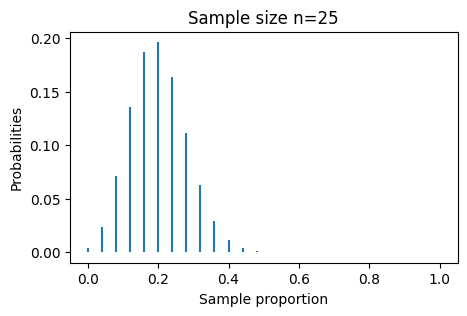

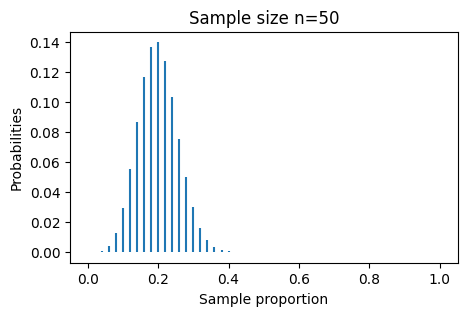

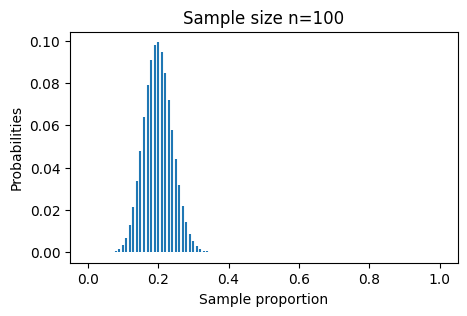

In [13]:
samp_dist(n=25, p=0.20)
samp_dist(n=50, p=0.20)
samp_dist(n=100, p=0.20)

2. In fact, authors of the paper [Adult persistence of head-turning asymmetry](https://www.nature.com/articles/421711a) collected a sample containing $124$ records, where 80 (64.5%) of them suggest right-turning preference, and 44 (35.5%) of them show left-turning preference. Identify the confidence interval for the parameter $p$, assuming confidence level $1-\alpha=0.95$.

**Solution**:

In [26]:
n = 124                             # Sample size n
m = 80                              # Right-turing cases in the sample
est = m / n                         # Estimate of the proportion
print(f"Estimate: {est}")
std = (est*(1-est)/n) ** 0.5        # The standard deviation of the estimate (margin of error)

alpha = 0.05                        # Confidence level alpha
z = norm.ppf(1 - alpha/2)           # z_{alpha/2} value

lower = est - z * std               # Lower bound of the interval
upper = est + z * std               # Upper bound of the interval

print(f"Confidence interval: [{lower}, {upper}]")

Estimate: 0.6451612903225806
Confidence interval: [0.5609467863424813, 0.72937579430268]


We can be $95\%$ confident that the true population proportion $\mu$ lies in the interval \[0.56095, 0.72938\]. Note that the lower bound 0.56095 is larger than 0.5, so the case that people have "left-turning bias" ($\mu<0.5$) is out of our $95\%$ confidence interval, thus the chance is below 0.05. It appears to be a good support of a "right-turning" tendency. 

3. Use hypothesis testing to show that humans have a preference of turning heads toward the right, assuming significance level $\alpha=0.05$. 

**Solution**: 

The null and alternative hypotheses are respectively $H_0$ and $H_a$. 
$$
\begin{align}
&H_0: p \leq p_0=0.5 \\
&H_a: p > p_0=0.5
\end{align}
$$

The sample mean is $p_0=0.5$, and the standard deviation is $\sqrt{p_0(1-p_0)}$. We can then calculate the $Z$ value of the sample as the previous example.
$$
Z = \frac{\hat{p} - p_0}{\sqrt{p_0(1-p_0)/n}} = \frac{80/124 - 0.5}{\sqrt{0.5 \times 0.5/124}} = 3.239
$$

Because the $Z$ value follows a standard normal distribution (zero mean and standard deviation to be one), we therefore find the probability $P\left\{Z > 3.239\right\} = 0.00061$ as the $P$-value is for a right-tailed test. 

<img src="https://github.com/XiongPengNUS/dao_resources/blob/main/p_values_test_types.png?raw=true">

In [15]:
n = 124                                     # Sample size
p_0 = 0.5                                   # Proportion of the null hypothesis
alpha = 0.05                                # Significance level
est = 80 / 124                              # Estimate
Z = (est - p_0) / (p_0*(1-p_0)/n)**0.5      # Z-value 
p_value = 1 - norm.cdf(Z)                   # P-value

print(f"P-value: {p_value}")

P-value: 0.0006127120353353055
